## INTRODUCTION

In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. 


In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
train_set = pd.read_csv('adult.data', header = None, na_values=[" ?"])
test_set = pd.read_csv('adult.test' , skiprows = 1, header = None, na_values=[" ?"])

In [3]:
# Set the columns for the same
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status', 'occupation','relationship', 'race','sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
# Concat the datasets
dataset = pd.concat([train_set,test_set], axis=0)

In [7]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### As we have to predict whether the person would do whether a person makes over 50K per year or not, lets convert the column to 1 and 0

In [8]:
dataset["Income"] = dataset["wage_class"].apply(lambda x: 0 if x == " <=50K" else 1)
# Drop wage class
dataset.drop("wage_class", axis=1, inplace=True)

In [9]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [10]:
dataset = dataset.replace(' ?', np.nan)

In [11]:
### Check if there are any null values
dataset.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
Income               0
dtype: int64

Text(0.5, 1.0, 'Income distribution by age')

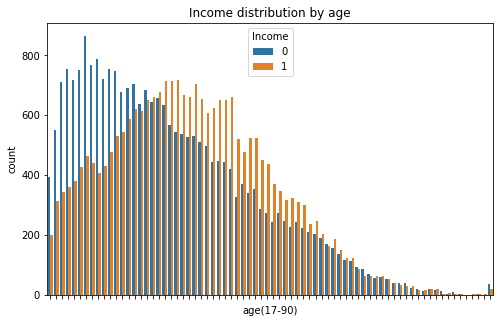

In [12]:
# age
# figure :income distribution by age 
# x_label is 'age', y_label is 'number of people divided by income'
fig, axis = plt.subplots(1, 1, figsize=(8,5))
sns.countplot(x='age', hue='Income', data=dataset, ax=axis)
axis.set_xticklabels([])
axis.set_xlabel('age(17-90)')
axis.set_title('Income distribution by age')

[Text(0, 0, ' State-gov'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, 'missing_workclass'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

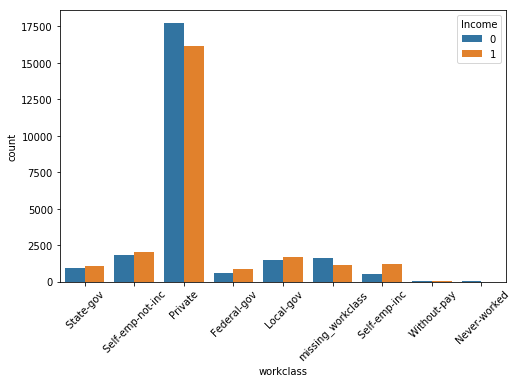

In [13]:
# workclass

# mark the NAN with 'missing_workclass'
# we can drop 'Without-pay' & 'Never-worked' because its small number
fig, axis = plt.subplots(1, 1, figsize=(8,5))
dataset['workclass'] = dataset['workclass'].fillna('missing_workclass')
sns.countplot(x='workclass', hue='Income', data=dataset, ax=axis)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)

In [14]:
# create dummies values
workclass_dummies_values = pd.get_dummies(dataset['workclass'])
dataset = dataset.join(workclass_dummies_values)
dataset.drop(['workclass', ' Without-pay', ' Never-worked'], axis=1, inplace=True)

In [15]:
# Drop fnlwgt weight
dataset.drop('fnlwgt', axis=1, inplace=True)

[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' 12th'),
 Text(0, 0, ' Preschool')]

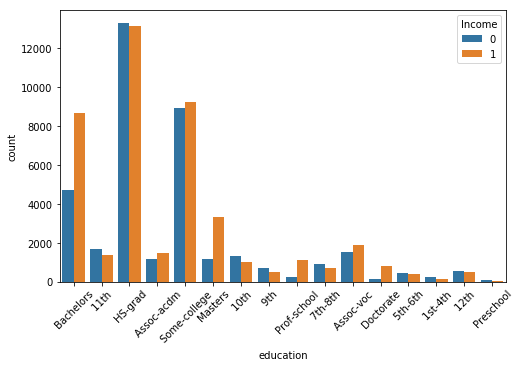

In [16]:
# education
fig, axis = plt.subplots(1, 1, figsize=(8,5))
sns.countplot(x='education', hue='Income', data=dataset)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)

In [17]:
# dummies values
education_dummies_values = pd.get_dummies(dataset['education'])
dataset = dataset.join(education_dummies_values)
dataset.drop(['education'], axis=1, inplace=True)

[Text(0, 0, ' Never-married'),
 Text(0, 0, ' Married-civ-spouse'),
 Text(0, 0, ' Divorced'),
 Text(0, 0, ' Married-spouse-absent'),
 Text(0, 0, ' Widowed'),
 Text(0, 0, ' Separated'),
 Text(0, 0, ' Married-AF-spouse')]

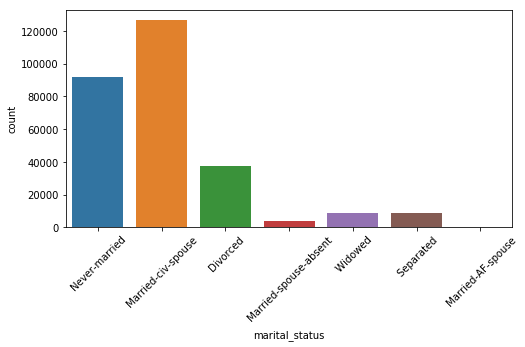

In [18]:
# marital_status	

# figure 1: count by 'marital.status'
fig, axis1 = plt.subplots(1, 1, figsize=(8,4))
sns.countplot(x='marital_status', data=dataset, ax=axis1)
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=45)


In [19]:
# dummies values
dataset = pd.concat([dataset, pd.get_dummies(dataset['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
dataset.drop('marital_status',axis=1,inplace=True)

In [20]:
# Relationship
dataset = pd.concat([dataset, pd.get_dummies(dataset['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
dataset.drop('relationship',axis=1,inplace=True)

In [21]:
# Race
dataset = pd.concat([dataset, pd.get_dummies(dataset['race'],prefix='race',prefix_sep=':')], axis=1)
dataset.drop('race',axis=1,inplace=True)

In [22]:
# Sex
dataset = pd.concat([dataset, pd.get_dummies(dataset['sex'],prefix='sex',prefix_sep=':')], axis=1)
dataset.drop('sex',axis=1,inplace=True)

In [43]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
dataset.drop('occupation',axis=1,inplace=True)

In [23]:
# Native Country
dataset = pd.concat([dataset, pd.get_dummies(dataset['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
dataset.drop('native_country',axis=1,inplace=True)

In [28]:
# capital.gain	(stock & bond & real estate)
# capital.loss	

# combine them, named 'capital_flow'

dataset["capital_flow"] = dataset['capital_gain'] - dataset['capital_loss']

In [29]:
# Drop capital_gain, capital_loss
dataset.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

### XGBOOST

In [53]:
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
# Create the independent and the dependent variable
# here we drop columns with missing values because it brings improvement, based on results
# 'missing_occupation', 'missing_nation', 'missing_workclass' 
ind = dataset.drop('Income', axis=1)
dep = dataset['Income']

In [45]:
# Train and test dataset
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.3, random_state=23)

In [49]:
xgb = xgboost.XGBClassifier(max_depth=6)

In [50]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
predict = xgb.predict(X_test)

In [57]:
confusion_matrix(y_test, predict)

array([[160962, 318376],
       [100121, 675806]], dtype=int64)

In [58]:
print ("Accuracy Score :", accuracy_score(y_test, predict))

Accuracy Score : 0.666606652778497


In [59]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.62      0.34      0.43    479338
           1       0.68      0.87      0.76    775927

   micro avg       0.67      0.67      0.67   1255265
   macro avg       0.65      0.60      0.60   1255265
weighted avg       0.66      0.67      0.64   1255265

